<a href="https://colab.research.google.com/github/salmaelfeel/Car-plate-detection-and-scene-description/blob/main/YOLO%2BPaddleOCR%2BViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00


In [3]:
!pip install paddlepaddle
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.0 MB/s eta 0:00:00
   ━━━━

In [1]:
import json
import torch
from PIL import Image
from ultralytics import YOLO
from paddleocr import PaddleOCR
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
# --- Paths ---
img_path = "/content/car2.png"

# ========== 1. YOLOv8 Plate Detection ==========
yolo_model = YOLO("/content/license_plate_detector.pt")
results = yolo_model(img_path, show=False, save=False)
boxes = results[0].boxes
labels = results[0].names

yolo_output = []
for box in boxes:
    xyxy = box.xyxy[0].cpu().numpy().tolist()
    conf = float(box.conf[0])
    cls_id = int(box.cls[0])
    label = labels[cls_id]

    yolo_output.append({
        "label": label,
        "confidence": round(conf, 3),
        "box": {
            "x1": round(xyxy[0], 1),
            "y1": round(xyxy[1], 1),
            "x2": round(xyxy[2], 1),
            "y2": round(xyxy[3], 1)
        }
    })


image 1/1 /content/car2.png: 512x640 1 license_plate, 364.2ms
Speed: 9.9ms preprocess, 364.2ms inference, 29.3ms postprocess per image at shape (1, 3, 512, 640)


In [3]:
# ========== 2. OCR ==========
import cv2

'''
ocr_model = PaddleOCR(use_angle_cls=False, lang='en')
result = ocr_model.predict('/content/car2.png')

texts = result[0]['rec_texts']
scores = result[0]['rec_scores']
'''
#############
ocr_model = PaddleOCR(use_angle_cls=True, lang='en')
ocr_texts = []

image_cv = cv2.imread(img_path)

for plate in yolo_output:
    box = plate["box"]
    x1, y1, x2, y2 = map(int, [box["x1"], box["y1"], box["x2"], box["y2"]])
    cropped_plate = image_cv[y1:y2, x1:x2]

    temp_path = "temp_plate.png"
    cv2.imwrite(temp_path, cropped_plate)

    ocr_result = ocr_model.ocr(temp_path)

    if ocr_result and isinstance(ocr_result[0], list):
        for line in ocr_result[0]:
            txt = line[1][0]
            score = line[1][1]
            ocr_texts.append({"text": txt, "confidence": round(score, 3)})

# ========== 3. Scene Caption ==========
caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
device = "cuda" if torch.cuda.is_available() else "cpu"
caption_model.to(device)

image = Image.open(img_path).convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
with torch.no_grad():
    output_ids = caption_model.generate(pixel_values, max_length=64)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# ========== 4. Combine All Outputs ==========
result_json = {
    "image": img_path,
    "detections": yolo_output,
    "ocr_texts": ocr_texts,
    "scene_caption": caption
}

# Save to file
with open("combined_output.json", "w") as f:
    json.dump(result_json, f, indent=2)

# Print nicely
print(json.dumps(result_json, indent=2))

/tmp/ipython-input-3-3128944961.py:12: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=True, lang='en')
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:715: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggin

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

/tmp/ipython-input-3-3128944961.py:25: DeprecationWarning: Please use `predict` instead.
  ocr_result = ocr_model.ocr(temp_path)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.53.0. You should pass an instance of `Cache` instead, e.g. `past_key_values=DynamicCache.from_legacy_cache(past_key_values)`.


{
  "image": "/content/car2.png",
  "detections": [
    {
      "label": "license_plate",
      "confidence": 0.81,
      "box": {
        "x1": 310.6,
        "y1": 327.1,
        "x2": 423.2,
        "y2": 401.8
      }
    }
  ],
  "ocr_texts": [],
  "scene_caption": "a man standing in front of a red car "
}


In [9]:
img_path='/content/car2.png'

ocr_result = ocr_model.predict(img_path)
if ocr_result and isinstance(ocr_result[0], list):
    for line in ocr_result[0]:
        txt = line[1][0]
        score = line[1][1]
        ocr_texts.append({"text": txt, "confidence": round(score, 3)})
print(ocr_texts)

[]


In [ ]:
ocr_model = PaddleOCR(use_angle_cls=False, lang='en')
result = ocr_model.predict('/content/car2.png')

texts = result[0]['rec_texts']
scores = result[0]['rec_scores']

for i, (text, score) in enumerate(zip(texts, scores)):
    print(f"📌 Line {i+1}: Text = '{text}' | Confidence = {score:.2f}")
    #

/tmp/ipython-input-40-2395291572.py:1: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=False, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

📌 Line 1: Text = 'NEVADA' | Confidence = 1.00
📌 Line 2: Text = 'X0017' | Confidence = 0.92
📌 Line 3: Text = 'de' | Confidence = 0.33


===============================================================

In [ ]:
from paddleocr import PaddleOCR
from PIL import Image

# Initialize OCR
ocr_model = PaddleOCR(use_angle_cls=False, lang='en')

/tmp/ipython-input-6-3428532828.py:5: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=False, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
result = ocr_model.predict('/content/car.png')

texts = result[0]['rec_texts']
scores = result[0]['rec_scores']

for i, (text, score) in enumerate(zip(texts, scores)):
    print(f"📌 Line {i+1}: Text = '{text}' | Confidence = {score:.2f}")

📌 Line 1: Text = '' | Confidence = 0.00
📌 Line 2: Text = 'CRISROK' | Confidence = 0.97


In [ ]:
result = ocr_model.predict('/content/car2.png')

texts = result[0]['rec_texts']
scores = result[0]['rec_scores']

for i, (text, score) in enumerate(zip(texts, scores)):
    print(f"📌 Line {i+1}: Text = '{text}' | Confidence = {score:.2f}")

📌 Line 1: Text = 'NEVADA' | Confidence = 1.00
📌 Line 2: Text = 'X0017' | Confidence = 0.92
📌 Line 3: Text = 'de' | Confidence = 0.33


# The INTEGRATION

In [ ]:
!pip install -q onnxruntime opencv-python paddleocr paddlepaddle Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 799.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import json
import numpy as np
from paddleocr import PaddleOCR

# Load YOLOv11 trained .pt model
model = YOLO("/content/best.pt")

# Run detection
results = model("/content/car2.png", save=False)

# Load original image
img = cv2.imread("/content/car2.png")

# Init PaddleOCR
ocr_model = PaddleOCR(use_angle_cls=False, lang='en')

# Prepare output
detections = []
for box in results[0].boxes:
    conf = float(box.conf[0])
    if conf < 0.5:
        continue  # Skip low-confidence boxes

    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

    # Crop detected region
    cropped = img[y1:y2, x1:x2]
    if cropped.size == 0:
        continue  # Avoid empty crops

    cv2.imwrite("temp_crop.jpg", cropped)

    # OCR
    ocr_result = ocr_model.predict("temp_crop.jpg")
    text = ""
    score = 0.0
    if ocr_result and "rec_texts" in ocr_result[0] and ocr_result[0]["rec_texts"]:
        text = ocr_result[0]["rec_texts"][0]
        score = ocr_result[0]["rec_scores"][0]

    # Append detection
    detections.append({
        "box": [x1, y1, x2, y2],
        "box_conf": round(conf, 3),
        "text": text,
        "text_conf": round(score, 3)
    })

# Save to JSON
output = {
    "image": "car2.png",
    "detections": detections
}

with open("final_output.json", "w") as f:
    json.dump(output, f, indent=2)

print("✅ final_output.json saved.")



image 1/1 /content/car2.png: 512x640 1 License_Plate, 183.0ms
Speed: 3.7ms preprocess, 183.0ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 640)


/tmp/ipython-input-37-1736089606.py:17: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=False, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

✅ final_output.json saved.


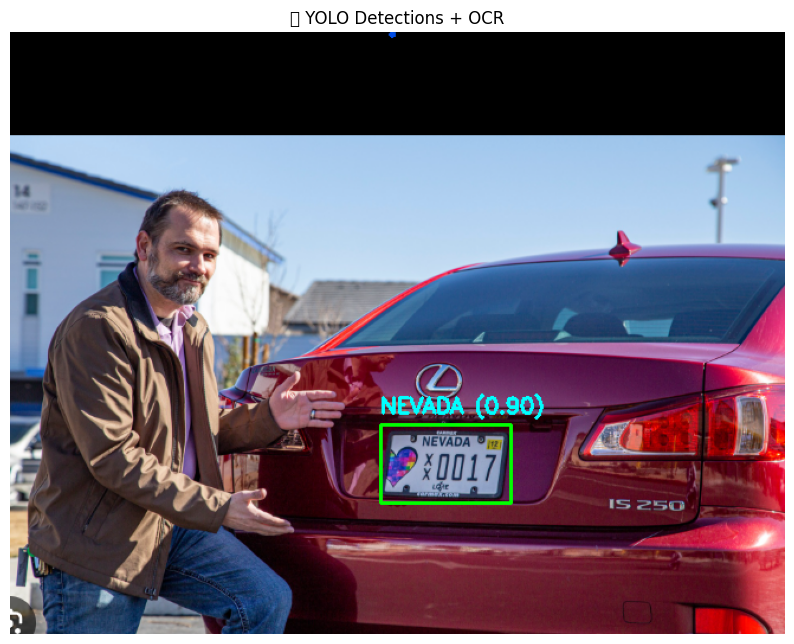

In [ ]:
import matplotlib.pyplot as plt

# Make a copy of original image to draw on
img_draw = img.copy()

for det in detections:
    x1, y1, x2, y2 = det["box"]
    label = det["text"]
    conf = det["box_conf"]

    # Draw rectangle
    cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put label text
    label_text = f'{label} ({conf:.2f})'
    cv2.putText(img_draw, label_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)

# Save and show
cv2.imwrite("annotated_output.jpg", img_draw)

# Show inside notebook
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("🔍 YOLO Detections + OCR")
plt.show()

# OWL ViT

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-qrhs72ca
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-qrhs72ca
  Resolved https://github.com/huggingface/transformers.git to commit a6393e7d28e652c598ced79f0107f1eff370df1b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.55.0.dev0-py3-none-any.whl size=12121361 sha256=b42b3cea74aec9b30cfd49d303361c138fc617bcc7c899553e12e9cdc213b14c
  Stored in directory: /tmp/pip-ephem-wheel-cache-ni2pkpog/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.54.0
    Uninstalling transformers-4.54.0:
      Successfully uninstalled transformers-4.54.0


In [ ]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("MAGAer13/mplug-owl2-llama2-7b", torch_dtype="auto")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ValueError: The checkpoint you are trying to load has model type `mplug_owl2` but Transformers does not recognize this architecture. This could be because of an issue with the checkpoint, or because your version of Transformers is out of date.

You can update Transformers with the command `pip install --upgrade transformers`. If this does not work, and the checkpoint is very new, then there may not be a release version that supports this model yet. In this case, you can get the most up-to-date code by installing Transformers from source with the command `pip install git+https://github.com/huggingface/transformers.git`

In [ ]:
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import torch

# Load model (open-access)
model_id = "google/owlvit-base-patch32"
processor = OwlViTProcessor.from_pretrained(model_id)
model = OwlViTForObjectDetection.from_pretrained(model_id)


preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

a car: 0.71, box: [92.66575622558594, 166.24777221679688, 622.4207763671875, 522.3811645507812]


/usr/local/lib/python3.11/dist-packages/transformers/models/owlvit/processing_owlvit.py:221: FutureWarning: `post_process_object_detection` method is deprecated for OwlVitProcessor and will be removed in v5. Use `post_process_grounded_object_detection` instead.
  warnings.warn(


In [ ]:
!pip install transformers_stream_generator

  Preparing metadata (setup.py) ... done
  Created wheel for transformers_stream_generator: filename=transformers_stream_generator-0.0.5-py3-none-any.whl size=12426 sha256=0f128f25403862cf3a40156b7a28f7a9a4f4ef5fc2818fb7007287cca417c99c
  Stored in directory: /root/.cache/pip/wheels/23/e8/f0/b3c58c12d1ffe60bcc8c7d121115f26b2c1878653edfca48db
Successfully built transformers_stream_generator


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

#pipe = pipeline("text-generation", model="Qwen/Qwen-VL-Chat", trust_remote_code=True)
# Load model directly
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL-Chat", trust_remote_code=True, torch_dtype="auto"),

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Load model
#model_id = "Qwen/Qwen-VL-Chat"
#processor = AutoProcessor.from_pretrained(model_id)
#model = AutoModelForVision2Seq.from_pretrained(model_id, torch_dtype=torch.float16, low_cpu_mem_usage=True).eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Load image
image = Image.open("/content/scene2.png").convert("RGB")

# Set prompt
prompt = "Describe the scene in English."

# Prepare input
inputs = processor(text=prompt, images=image, return_tensors="pt").to(model.device)

# Generate output
with torch.no_grad():
    generated_ids = model.generate(**inputs, max_new_tokens=100)
    output = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("📝 Scene Description:", output)

tokenizer_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

The repository Qwen/Qwen-VL-Chat contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat .
 You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


configuration_qwen.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat:
- configuration_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


The repository Qwen/Qwen-VL-Chat contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat .
 You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


tokenization_qwen.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken: 0.00B [00:00, ?B/s]

SimSun.ttf:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/modeling_auto.py:2160: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


The repository Qwen/Qwen-VL-Chat contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat .
 You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] n


ValueError: The repository Qwen/Qwen-VL-Chat contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat .
 You can inspect the repository content at https://hf.co/Qwen/Qwen-VL-Chat.
Please pass the argument `trust_remote_code=True` to allow custom code to be run.

Owl is gated and only for object detection

qwen is large

now blip2 is very large

blip1 is weak

donut wrong decription


gpt2

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch

# Load lightweight captioning model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Load image
image = Image.open("/content/scene.png").convert("RGB")

# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

with torch.no_grad():
    output_ids = model.generate(pixel_values, max_length=64)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("📝 Scene Description:", caption)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/scene.png'

📝 Scene Description: a man standing next to a parked car 


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Load model
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa").to("cuda" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/803M [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/scene.png'

In [ ]:

# Load image
image = Image.open("/content/scene2.png").convert("RGB")

# Prompt as a question
prompt = "<s_docvqa><s_question>Describe the scene</s_question><s_answer>"

# Process
pixel_values = processor(image, return_tensors="pt").pixel_values.to(model.device)
decoder_input_ids = processor.tokenizer(prompt, add_special_tokens=False, return_tensors="pt").input_ids.to(model.device)

# Generate
outputs = model.generate(pixel_values, decoder_input_ids=decoder_input_ids, max_new_tokens=64)
caption = processor.tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

print("📝 Scene Description:", caption)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


📝 Scene Description: Describe the scene attitude


In [ ]:
# Step 1: Download and cache the model
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="Salesforce/blip2-opt-2.7b",
    local_dir="/content/blip2_model",
    local_dir_use_symlinks=False  # optional, makes it work better in Colab
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

pytorch_model.bin.index.json: 0.00B [00:00, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 9996.33 MB. The target location /root/.cache/huggingface/hub/models--Salesforce--blip2-opt-2.7b/blobs only has 0.00 MB free disk space.
  warnings.warn(


model-00001-of-00002.safetensors:  48%|####8     | 9.28G/19.3G [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device

In [ ]:
# Step 2: Load the model and processor from the cached folder
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import torch

processor = Blip2Processor.from_pretrained("/content/blip2_model")
model = Blip2ForConditionalGeneration.from_pretrained(
    "/content/blip2_model",
    torch_dtype=torch.float16  # Optional: if you're using GPU
).to("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
image = Image.open("scene2.jpg").convert("RGB")

inputs = processor(images=image, text="Describe the image", return_tensors="pt")
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)

print("Caption:", caption)

In [ ]:

'''
!pip install -q transformers

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")
'''
# Load image
image = Image.open("/content/scene2.png").convert("RGB")
# Prompted caption generation
prompt = "Describe this traffic scene in detail."

inputs = processor(images=image, return_tensors="pt").to(model.device)

with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=50)

caption = processor.decode(output[0], skip_special_tokens=True)
print("📝 Caption:", caption)

📝 Caption:  Crash football agenda super knockeda


In [ ]:
import gradio as gr

def greet(name):
    return f"Hello, {name}!"

gr.Interface(fn=greet, inputs="text", outputs="text").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://98f4d082850d5dc71e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# THE MODEL

In [ ]:
import gradio as gr
import cv2
import torch
import json
import numpy as np
from PIL import Image
from ultralytics import YOLO
from paddleocr import PaddleOCR
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

In [ ]:
import os

if os.path.exists("/content/license_plate_detector.pt"):
    yolo_model = YOLO("/content/license_plate_detector.pt")  # DONT FORGET TO SWITCH IT
    ocr_model = PaddleOCR(use_angle_cls=False, lang='en') # DONT forget to make it true + thershold

    caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    caption_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    caption_tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

    device = "cuda" if torch.cuda.is_available() else "cpu"
    caption_model.to(device)


    def process_image(input_image):
        # Convert PIL to OpenCV
        cv_img = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

        # --- Plate Detection ---
        results = yolo_model(cv_img, verbose=False)

        detections = []
        plate_count = 0

        for box in results[0].boxes:
            conf = float(box.conf[0])
            if conf < 0.5:
                continue
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            cropped = cv_img[y1:y2, x1:x2]
            if cropped.size == 0:
                continue

            temp_path = "temp_plate.jpg"
            cv2.imwrite(temp_path, cropped)

            # --- OCR ---
            ocr_result = ocr_model.ocr(temp_path)
            text = ""
            score = 0.0
            if ocr_result and len(ocr_result[0]) > 0:
                text = ocr_result[0][0][1][0]
                score = ocr_result[0][0][1][1]

            detections.append({
                "box": [x1, y1, x2, y2],
                "box_conf": round(conf, 3),
                "text": text,
                "text_conf": round(score, 3)
            })

            plate_count += 1

        # --- Scene Captioning ---
        pil_image = input_image.convert("RGB")
        pixel_values = caption_processor(images=pil_image, return_tensors="pt").pixel_values.to(device)
        with torch.no_grad():
            output_ids = caption_model.generate(pixel_values, max_length=64)
            caption = caption_tokenizer.decode(output_ids[0], skip_special_tokens=True)

        # --- JSON Output ---
        output = {
            "num_plates": plate_count,
            "plates": detections,
            "scene_description": caption
        }

        # Save to file
        with open("result.json", "w") as f:
            json.dump(output, f, indent=2)

        return output


    # --- Gradio Interface ---
    demo = gr.Interface(
        fn=process_image,
        inputs=gr.Image(type="pil"),
        outputs=gr.JSON(),
        title=" Plate Detection + OCR + Scene Captioning",
        description="Upload an image. Get plate locations, text, and a scene description in JSON format."
    )

    demo.launch()
else:
    print("Error: /content/license_plate_detector.pt not found. Please upload the model file.")

/tmp/ipython-input-17-3248627666.py:5: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=False, lang='en') # DONT forget to make it true + thershold
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08a3a5a05a75ee5fc1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


MODEL AGAIN!

In [ ]:
import os
import cv2
import json
import numpy as np
import gradio as gr
from PIL import Image
import torch
from ultralytics import YOLO
from paddleocr import PaddleOCR
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

# === Load Models ===
MODEL_PATH = "/content/license_plate_detector.pt"

if not os.path.exists(MODEL_PATH):
    print(f"❌ Error: {MODEL_PATH} not found. Please upload the model file.")
else:
    print("✅ Loading models...")

    # Load YOLOv11 model
    yolo_model = YOLO(MODEL_PATH)

    # PaddleOCR (you can tune cls and threshold later if needed)
    ocr_model = PaddleOCR(use_angle_cls=True, lang='en')

    # Scene Captioning (ViT-GPT2)
    caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    caption_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
    caption_tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

    device = "cuda" if torch.cuda.is_available() else "cpu"
    caption_model.to(device)

/tmp/ipython-input-44-2920231001.py:24: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr_model = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


✅ Loading models...


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#yolo model
import json
img_path="/content/car2.png"

results = yolo_model(img_path, show=True, save=True)
boxes = results[0].boxes
labels = results[0].names

# Create JSON list
output = []
for box in boxes:
    xyxy = box.xyxy[0].cpu().numpy().tolist()
    conf = float(box.conf[0])
    cls_id = int(box.cls[0])
    label = labels[cls_id]

    output.append({
        "label": label,
        "confidence": round(conf, 3),
        "box": {
            "x1": round(xyxy[0], 1),
            "y1": round(xyxy[1], 1),
            "x2": round(xyxy[2], 1),
            "y2": round(xyxy[3], 1)
        }
    })

# Optional: Add image path and model info
result_json = {
    "image": img_path,
    "detections": output
}

# Save to JSON file
with open("prediction_output.json", "w") as f:
    json.dump(result_json, f, indent=2)

# Display in notebook
print(json.dumps(result_json, indent=2))

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/car2.png: 512x640 1 license_plate, 331.2ms
Speed: 6.4ms preprocess, 331.2ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict
{
  "image": "/content/car2.png",
  "detections": [
    {
      "label": "license_plate",
      "confidence": 0.81,
      "box": {
        "x1": 310.6,
        "y1": 327.1,
        "x2": 423.2,
        "y2": 401.8
      }
    }
  ]
}


In [ ]:
def process_image(input_image):
        detections = []
        plate_count = 0

        # Convert PIL to OpenCV
        cv_img = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

        # --- Plate Detection ---
        try:
            results = yolo_model(cv_img, verbose=False)
            boxes = getattr(results[0], "boxes", None)

            if boxes is not None and hasattr(boxes, "xyxy") and hasattr(boxes, "conf"):
                for i in range(len(boxes)):
                    try:
                        box = boxes[i]
                        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                        conf = float(box.conf[0])

                        if conf < 0.5:
                            continue

                        cropped = cv_img[y1:y2, x1:x2]
                        if cropped.size == 0:
                            continue

                        # OCR
                        temp_path = "temp_plate.jpg"
                        cv2.imwrite(temp_path, cropped)
                        ocr_result = ocr_model.ocr(temp_path)
                        text = ""
                        score = 0.0
                        if ocr_result and len(ocr_result[0]) > 0:
                            text = ocr_result[0][0][1][0]
                            score = ocr_result[0][0][1][1]

                        detections.append({
                            "box": [x1, y1, x2, y2],
                            "box_conf": round(conf, 3),
                            "text": text,
                            "text_conf": round(score, 3)
                        })

                        plate_count += 1
                    except Exception as box_err:
                        print("⚠️ Error in box processing:", box_err)
            else:
                print("⚠️ YOLO returned no valid boxes.")
        except Exception as e:
            print("❌ Detection failed:", e)

        # --- Scene Captioning ---
        try:
            pil_image = input_image.convert("RGB")
            pixel_values = caption_processor(images=pil_image, return_tensors="pt").pixel_values.to(device)
            with torch.no_grad():
                output_ids = caption_model.generate(pixel_values, max_length=64)
                caption = caption_tokenizer.decode(output_ids[0], skip_special_tokens=True)
        except Exception as e:
            caption = "⚠️ Scene captioning failed"
            print("❌ Captioning error:", e)

        # --- Output JSON ---
        output = {
            "num_plates": plate_count,
            "plates": detections,
            "scene_description": caption
        }

        with open("result.json", "w") as f:
            json.dump(output, f, indent=2)

        return output

    # === Gradio App ===
demo = gr.Interface(
        fn=process_image,
        inputs=gr.Image(type="pil"),
        outputs=gr.JSON(),
        title="🚘 Plate Detection + OCR + Scene Captioning",
        description="Upload an image. Get plate locations, text, and a scene description in JSON format."
    )


demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e8f408ff33c3788d0a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
